In [1]:
# Import the necessary modules and libraries.
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import matplotlib.pyplot as plt
from IPython.display import Image  
from six import StringIO  
import pydot
from matplotlib.colors import ListedColormap

In [2]:
seed = 42
np.random.seed(seed)

In [3]:
# Define utility functions.
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

### Gerando os dados.

In [4]:
# Quadratic training set + noise.
N = 200
X = np.random.rand(N, 1)
y = 4 * (X - 0.5) ** 2
y_noisy = y + 0.1*np.random.randn(N, 1)

# Create validation set.
X_test = np.linspace(0.0, 1.0, N).reshape(N, 1)
y_test = 4 * (X_test - 0.5) ** 2

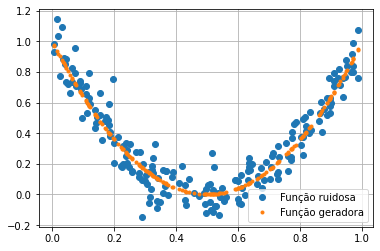

In [5]:
plt.plot(X,y_noisy,'o', label='Função ruidosa')
plt.plot(X,y,'.', label='Função geradora')
plt.grid()
plt.legend()
plt.show()

### Varying the hyperparameter 'max_depth'

In [6]:
# Instantiate and train the regression trees.
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg3 = DecisionTreeRegressor(random_state=42)

tree_reg1.fit(X, y_noisy)
tree_reg2.fit(X, y_noisy)
tree_reg3.fit(X, y_noisy)

DecisionTreeRegressor(random_state=42)

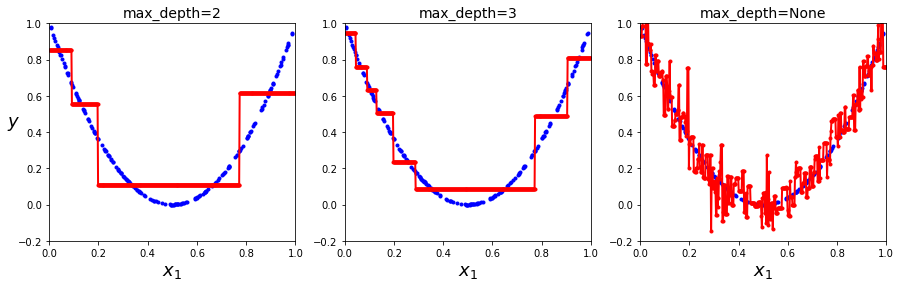

In [7]:
plt.figure(figsize=(15, 4))
plt.subplot(131)
plot_regression_predictions(tree_reg1, X, y)
plt.title("max_depth=2", fontsize=14)

plt.subplot(132)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
plt.title("max_depth=3", fontsize=14)

plt.subplot(133)
plot_regression_predictions(tree_reg3, X, y, ylabel=None)
plt.title("max_depth="+str(tree_reg3.max_depth), fontsize=14)

plt.show()

+ Percebam com com as árvores de decisão, a aproximação é feita em trechos.

In [8]:
y1 = tree_reg1.predict(X_test)
y2 = tree_reg2.predict(X_test)
y3 = tree_reg3.predict(X_test)

mse1 = mean_squared_error(y_test,y1)
mse2 = mean_squared_error(y_test,y2)
mse3 = mean_squared_error(y_test,y3)

print('mse1: ',mse1)
print('mse2: ',mse2)
print('mse3: ',mse3)

mse1:  0.017564467272882574
mse2:  0.0065133847228392786
mse3:  0.008273473295521633


### Varying the hyperparameter 'min_samples_leaf'

`min_samples_leaf`: define o número mínimo de exemplos que um nó folha deve ter.

In [9]:
# Instantiate and train the regression trees.
tree_reg0 = DecisionTreeRegressor(random_state=42)
tree_reg1 = DecisionTreeRegressor(random_state=42, min_samples_leaf=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=5)
tree_reg3 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)

tree_reg0.fit(X, y_noisy)
tree_reg1.fit(X, y_noisy)
tree_reg2.fit(X, y_noisy)
tree_reg3.fit(X, y_noisy)

DecisionTreeRegressor(min_samples_leaf=10, random_state=42)

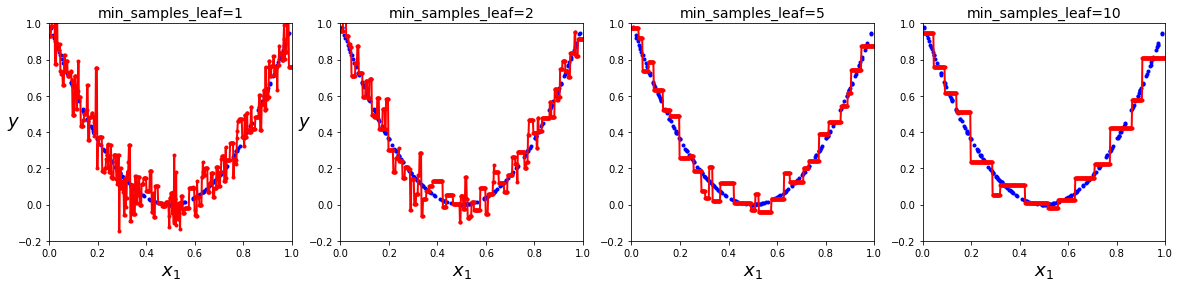

In [10]:
plt.figure(figsize=(20, 4))
plt.subplot(141)
plot_regression_predictions(tree_reg0, X, y)
plt.title("min_samples_leaf="+str(tree_reg0.min_samples_leaf), fontsize=14)

plt.subplot(142)
plot_regression_predictions(tree_reg1, X, y)
plt.title("min_samples_leaf="+str(tree_reg1.min_samples_leaf), fontsize=14)

plt.subplot(143)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
plt.title("min_samples_leaf="+str(tree_reg2.min_samples_leaf), fontsize=14)

plt.subplot(144)
plot_regression_predictions(tree_reg3, X, y, ylabel=None)
plt.title("min_samples_leaf="+str(tree_reg3.min_samples_leaf), fontsize=14)

plt.show()

### Observações

+ Observem como o valor previsto para cada região é sempre o valor médio dos exemplos nessa região. 

+ O algoritmo divide cada região de uma maneira que torna a maioria dos exemplos de treinamento o mais próximo possível do valor previsto.

+ Assim como em problemas de classificação, as **árvores de decisão** tendem a se ajustar demais ao lidar com tarefas de regressão. 

+ Sem nenhuma regularização (ou seja, usando os hiperparâmetros padrão), você obtém a previsão à esquerda da figura acima. 

+ Obviamente, o modelo está sobreajustando ao conjunto de treinamento. 

+ Porém, definir o hiperparâmetro `min_samples_leaf = 10` resulta em um modelo muito mais razoável, representado à direita da figura acima

In [11]:
y1 = tree_reg1.predict(X_test)
y2 = tree_reg2.predict(X_test)
y3 = tree_reg3.predict(X_test)

mse1 = mean_squared_error(y_test,y1)
mse2 = mean_squared_error(y_test,y2)
mse3 = mean_squared_error(y_test,y3)

print('mse1: ',mse1)
print('mse2: ',mse2)
print('mse3: ',mse3)

mse1:  0.0051922371118636205
mse2:  0.0029483054945663636
mse3:  0.0035981269262556625


### Using Grid Search to fine-tune 'max_depth' and 'min_samples_leaf' hyperparameters

+ Grid Search é uma técnica de ajuste fino dos hiperparâmetros.

In [12]:
# Set parameters for grid-search.
param_grid = [{'max_depth': [1, 2, 3, 4, 5, None], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

# Instantiate DT class.
reg = DecisionTreeRegressor(random_state=42)

# Instantiate GridSearch class.
grid_search = GridSearchCV(reg, param_grid, cv=5, verbose=3, n_jobs=-1)

# Find best hyperparameters.
grid_search.fit(X, y_noisy)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    4.3s finished


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, None],
                          'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             verbose=3)

In [13]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 6}

In [14]:
grid_search.best_score_

0.8925033576821919

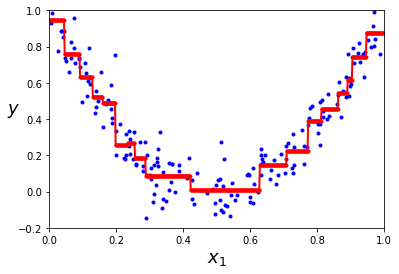

In [15]:
plot_regression_predictions(grid_search, X, y_noisy)

In [16]:
y_pred = grid_search.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print('mse: ',mse)

mse:  0.002101682238719835


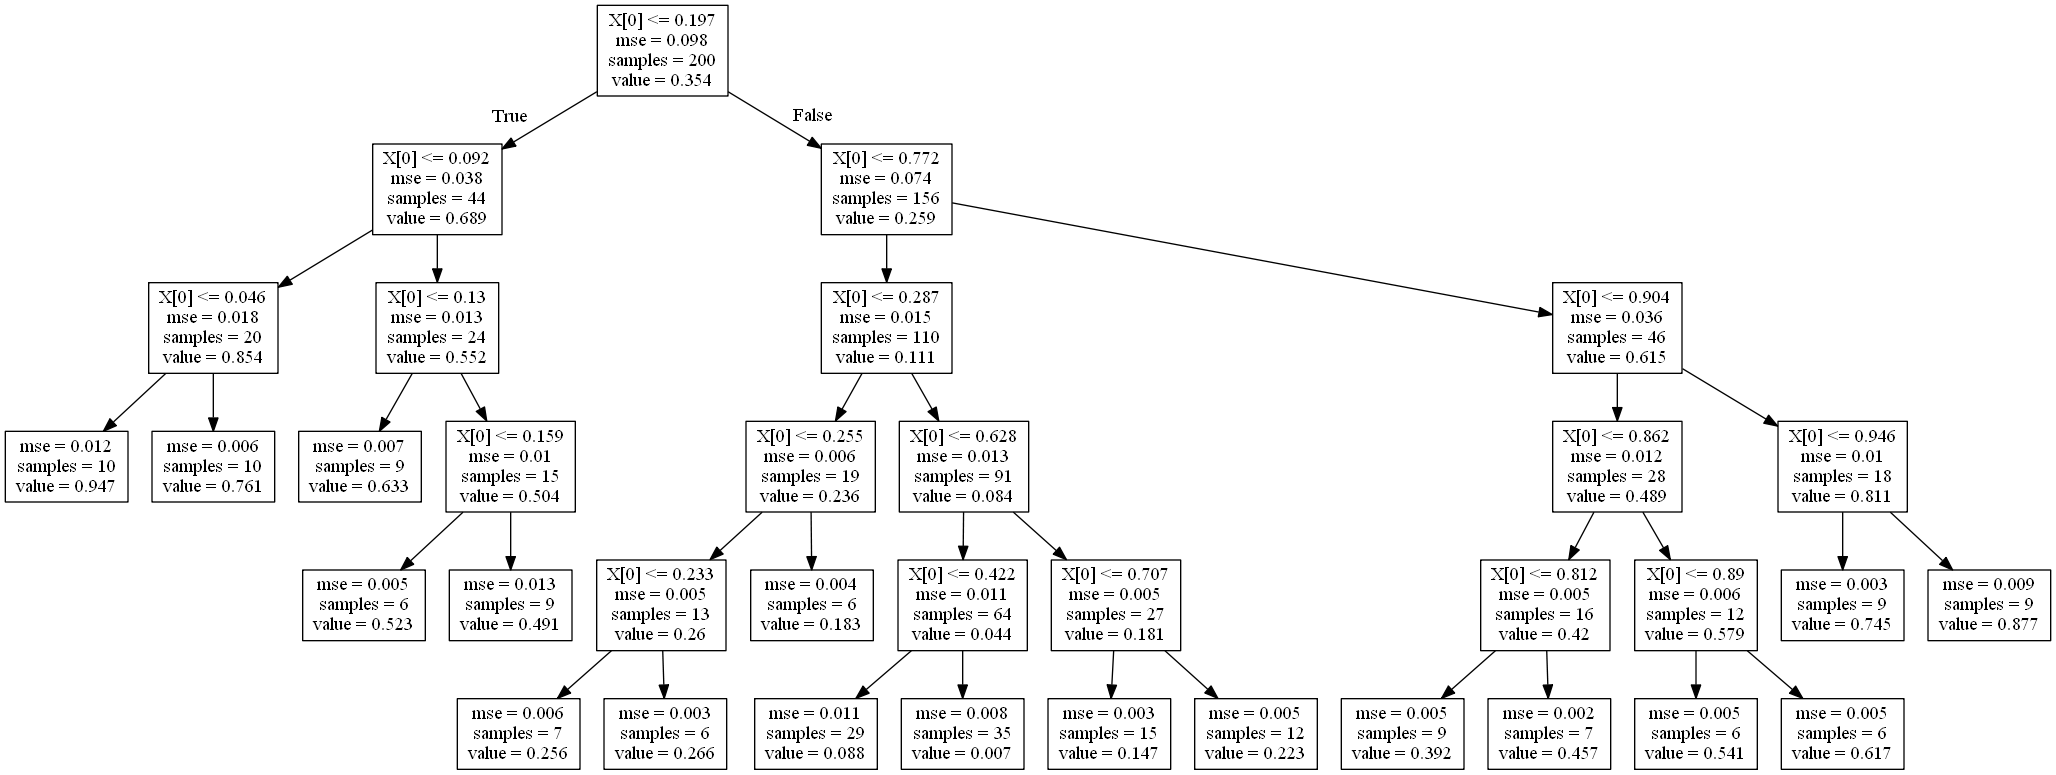

In [17]:
reg = DecisionTreeRegressor(random_state=42, max_depth=5, min_samples_leaf=6)
reg.fit(X, y_noisy)

# visualize the decision tree.
# you've got to have graphviz and pydot installed on your computer.
# Execute: conda install graphviz pydot
dot_data = StringIO()  
tree.export_graphviz(reg, out_file=dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())